<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simulations" data-toc-modified-id="Simulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Figure-6B" data-toc-modified-id="Figure-6B-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Figure 6B</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
module_path = 'code/' 
if module_path not in sys.path:
    sys.path.append(module_path)
from MM_Plot_Utils import plot, hist

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# 1.Simulations

Run Simulations.m first to count the Recovered Units with an accuracy score > 0.8 from sorted units' spiketimes with respect to ground truth units' spiketimes, saves at data/simdata/Pooling_data_reparse.csv


# 2.Visualization

Plot Fig 6B

In [2]:
sim_df = pd.read_csv('data/simdata/Pooling_data_reparse.csv')

- Standard conditions: peak to peak (p-p) amplitude = 380 µV; Electrode noise = 1.6 µV; Common Noise = 5.7 µV; Bio Noise = 9 µV; Rate = 10 Hz.
- Low amplitude: p-p amplitude = 205 µV
- High bio noise: Bio Noise = 15 µV
- High rate: Rate = 20 Hz
- Low common noise: Common Noise = 2.85 µV

Note 
- 380 µV is 90 percentile from the Allen Institute data set
- 205 µV is 50 percentile
- 75 µV is 10 percentile

In [3]:
sim_ntetr=np.arange(1,13,1) # number of electrodes per pool
sim_stand=sim_df.iloc[:,0:3] # standard case
sim_hibio=sim_df.iloc[:,3:6]
sim_hirat=sim_df.iloc[:,6:9]
sim_loamp=sim_df.iloc[:,9:12]
sim_locom=sim_df.iloc[:,12:15]

In [4]:
# mean over the 3 runs
sim_standm=np.mean(sim_stand,axis=1)
sim_loampm=np.mean(sim_loamp,axis=1)
sim_hibiom=np.mean(sim_hibio,axis=1)
sim_hiratm=np.mean(sim_hirat,axis=1)
sim_locomm=np.mean(sim_locom,axis=1)

In [5]:
# std over the 3 runs
sim_stands=np.std(sim_stand,axis=1)
sim_loamps=np.std(sim_loamp,axis=1)
sim_hibios=np.std(sim_hibio,axis=1)
sim_hirats=np.std(sim_hirat,axis=1)
sim_locoms=np.std(sim_locom,axis=1)

### Figure 6B

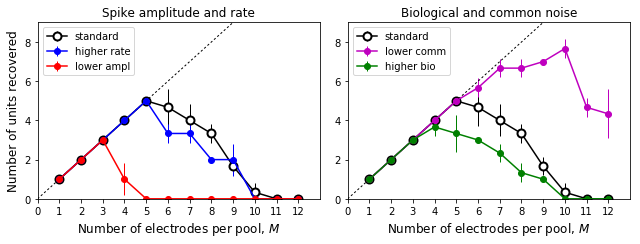

In [6]:
# plot the data
fig,ax=plt.subplots(1,2,figsize=(9,3.5))
plot(np.arange(10),np.arange(10),fmts=['k:'],xlim=[0,13],ylim=[0,9],xticks=list(range(13)),
    xlabel='Number of electrodes per pool, $M$',ylabel='Number of units recovered',
    linewidth=1,axes=ax[0]);
ax[0].errorbar(sim_ntetr,sim_standm,yerr=sim_stands,fmt='k-o',mfc='white',
               markersize=8,mew=2,label='standard',elinewidth=1); 
ax[0].errorbar(sim_ntetr,sim_hiratm,yerr=sim_hirats,fmt='b-o',label='higher rate',elinewidth=1); 
ax[0].errorbar(sim_ntetr,sim_loampm,yerr=sim_loamps,fmt='r-o',label='lower ampl',elinewidth=1); 
ax[0].legend(loc='upper left')
ax[0].set_title('Spike amplitude and rate')
plot(np.arange(10),np.arange(10),fmts=['k:'],xlim=[0,13],ylim=[0,9],xticks=list(range(13)),
    xlabel='Number of electrodes per pool, $M$',linewidth=1,axes=ax[1]);
ax[1].errorbar(sim_ntetr,sim_standm,yerr=sim_stands,fmt='k-o',mfc='white',
               markersize=8,mew=2,label='standard',elinewidth=1); 
ax[1].errorbar(sim_ntetr,sim_locomm,yerr=sim_locoms,fmt='m-o',label='lower comm',elinewidth=1); 
ax[1].errorbar(sim_ntetr,sim_hibiom,yerr=sim_hibios,fmt='g-o',label='higher bio',elinewidth=1); 
ax[1].legend(loc='upper left');
ax[1].set_title('Biological and common noise');
plt.savefig('figs/Simulations.pdf')